# The Boston housing dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* Feature variables
    * **CRIM**: per capita crime rate by town
    * **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
    * **INDUS**: proportion of non-retail business acres per town.
    * **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    * **NOX**: nitric oxides concentration (parts per 10 million)
    * **RM**: average number of rooms per dwelling
    * **AGE**: proportion of owner-occupied units built prior to 1940
    * **DIS**: weighted distances to five Boston employment centres
    * **RAD**: index of accessibility to radial highways
    * **TAX**: full-value property-tax rate per 10,000\$
    * **PTRATIO**: pupil-teacher ratio by town
    * **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of people of African American descent by town
    * **LSTAT**: \% lower status of the population


* Variable to predict:
    * **MEDV**: Median value of owner-occupied homes in 1000's of \$

#### Missing 
There are no missing values.

#### Objective
The objective is to predict the value of median house prices (**MEDV**) using the given features. Also, this exercise will serve us to introduce the concept of model assesment.

#### Table of contents
<ol>
    <li><a href="#preprocessing">Preprocessing</a></li>
    <li><a href="#exploratory_data_analysis">Exploratory data analysis</a></li>
        2.1. <a href="#univariate_analysis">Univariate analysis</a><br>
        2.2 <a href="#bivariate_analysis">Bivariate analysis</a><br>
    <li><a href="#regression_analysis">Regression analysis</a></li>
        3.1. <a href="#linear_regression">Linear regression</a><br>
        3.2. <a href="#lasso_regression">Lasso regression</a><br>
        3.3. <a href="#ridge_regression">Ridge regression</a><br>
        3.4. <a href="#decision_tree">Decision tree</a><br>
        3.5. <a href="#knn">KNN</a>
    <li><a href="#estimator_evaluation">Estimator evaluation</a></li>
</ol>

----

In [29]:
import pandas as pd

df = pd.read_csv("../Data/boston_housing.csv")
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<h2 id="#preprocessing">1 - Preprocessing</h2>

In [30]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

There are no categorical variables that we should preprocess or omit before starting our analysis. In addition, there are no missing values, so no imputation needs to be done.

<h2 id="#exploratory_data_analysis">2 - Exploratory data analysis</h2>

In [32]:
df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

<h3 id="#univariate_analysis">2.1 - Univariate analysis</h3>

##### MEDV

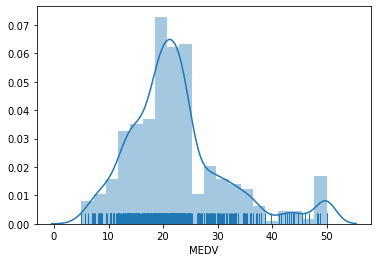

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

x = df["MEDV"]

sns.distplot(x, bins = 20, rug=True);

plt.show()

C:\Users\fer\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


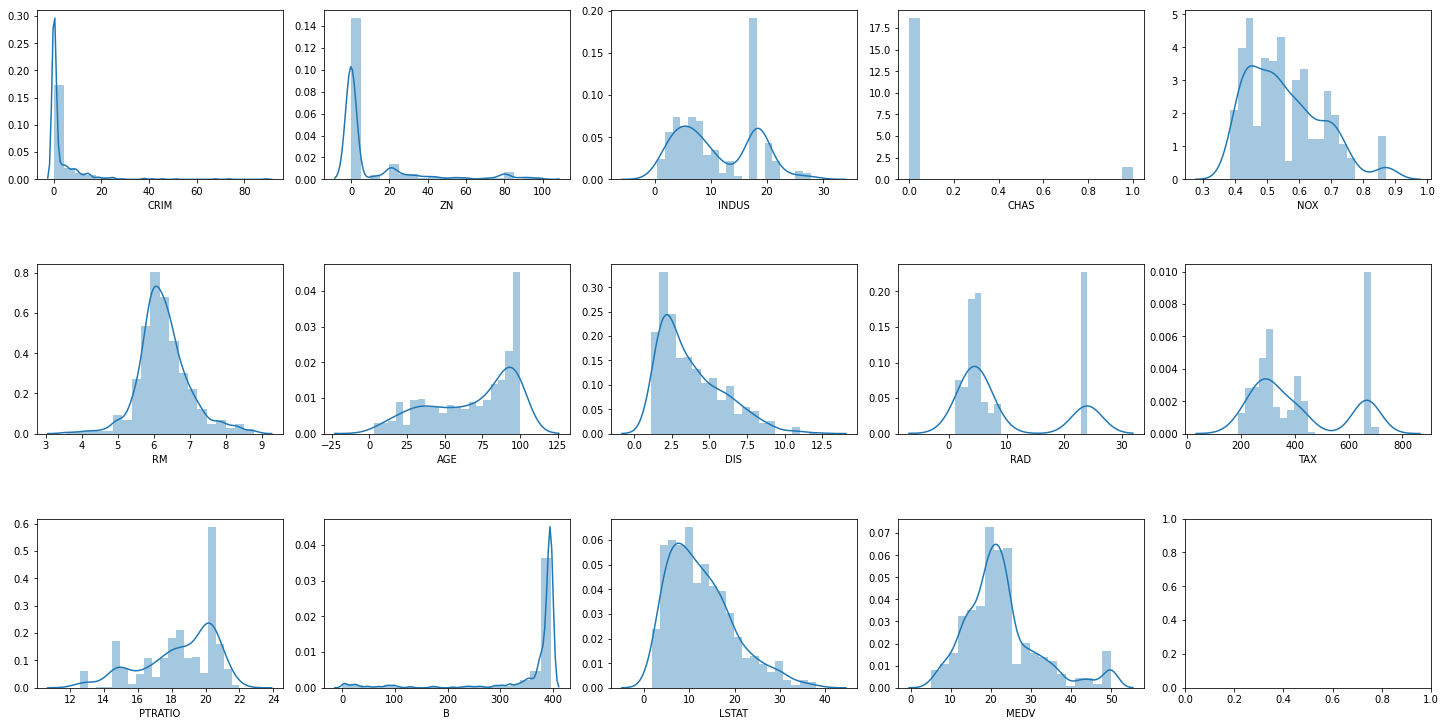

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
axs = axs.flatten() # 

index = 0
for k,v in df.items():
    sns.distplot(v, bins=20, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

There is one dummy variable that should be dropped before doing any further analysis: CHAS. We are going to drop it because it is categorical (two values and should not be directly considered in regression analysis)

In [36]:
df = df.drop(columns=["CHAS"])

<h3 id="#bivariate_analysis">2.2 - Bivariate analysis</h3>

#### Uni-dimensional regression plots

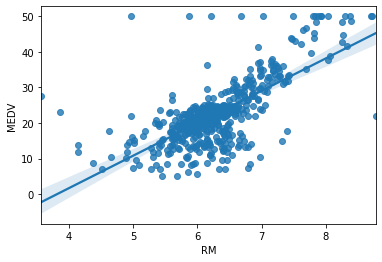

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

sns.regplot(x=df["RM"], y=df["MEDV"])

We observe that as the number of rooms in the house increases, the value of the house increases too.

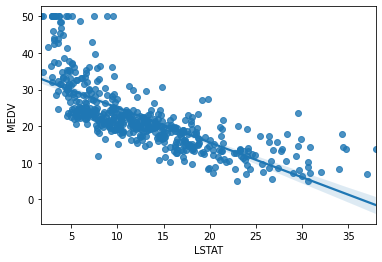

In [38]:
sns.regplot(x=df["LSTAT"], y=df["MEDV"])

We observe that as the percentage of lower status population in the neighborhood increases, the value of the house decreases.

#### Correlation matrix

In [42]:
df.corr()["MEDV"].abs().sort_values(ascending=False) # built-in sort function

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
Name: MEDV, dtype: float64

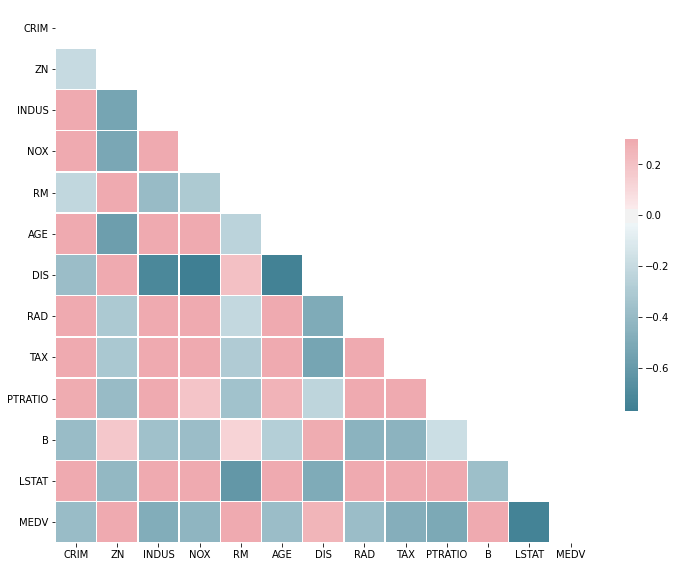

In [43]:
import numpy as np

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### Multiple regression plots

We ordered feature variables with respect to their absolute correlation coefficient with the target variable MEDV. The idea i to show that as correlation decreases, linear relationships worsen.

In [44]:
ordered_columns_corr = df.corr()["MEDV"].abs().sort_values(ascending=False).index
df.corr()["MEDV"].abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
Name: MEDV, dtype: float64

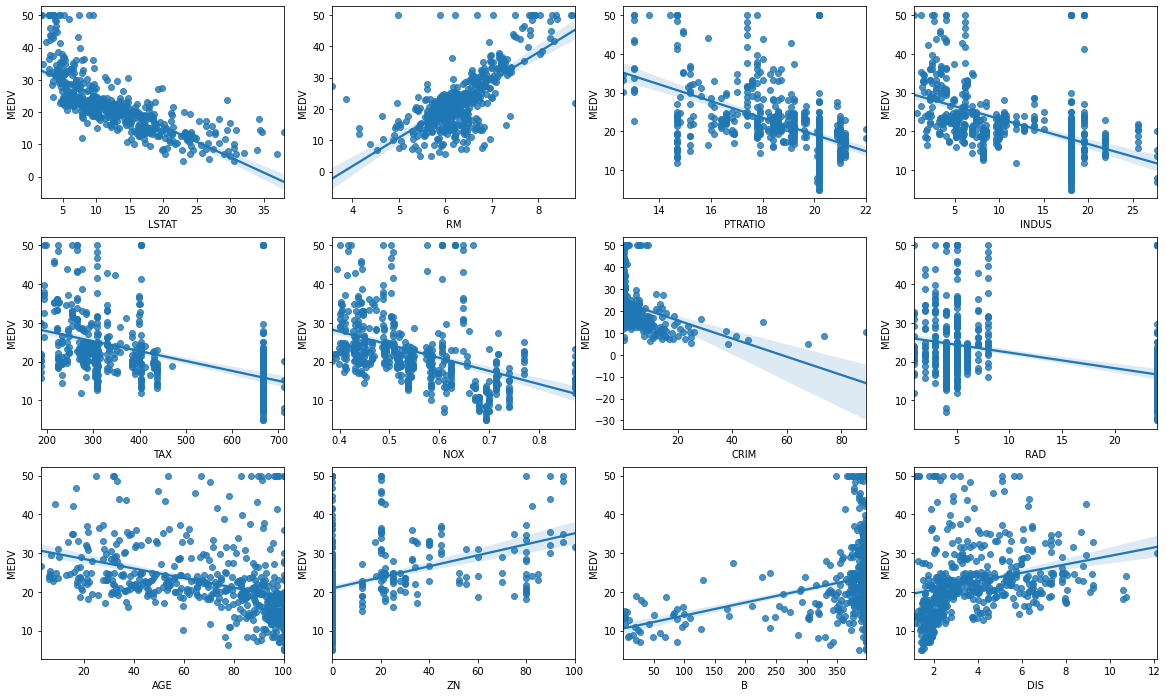

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 12))
axs = axs.flatten()

index = 0
for colname in ordered_columns_corr:
    if colname != "MEDV":
        sns.regplot(ax=axs[index], x=colname, y="MEDV", data=df)
        index += 1

<h2 id="#regression_analysis">3 - Regression analysis</h2>

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a **test set**. 

In addition, when evaluating different settings for estimators (such as k in the KNN), there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called **validation set**. 

<br>

<span style="color:blue">**Training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.**</span>

<br>
<img src="images/train_test_validation.png" width="500">

Therefore, data can be divided in three parts:
* **Training Dataset:** The sample of data used to fit the model.
* **Validation Dataset:** The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
* **Test Dataset:** The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.


However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets. A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

* A model is trained using  of the folds as training data.

* The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy, R2, MSE, etc.).

The performance measure reported by k-fold cross-validation is then the **average** of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

<br>
<img src="images/cross_validation.png" width="500">

----

For this, we split the dataset in two parts: train and test. We use <code><a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a></code> function provided by scikit-learn. In addition, for those estimators with hyperparameters, we will use a cross validated score via the <code><a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">cross_val_score</a></code> function provided by scikit-learn. We will use a 80% train 20% test ratio, but other ratios could be used instead.

In [50]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["MEDV"])
Y = df["MEDV"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

For comparison purposes, we will use the **R2 score** (also known as the coefficient of determination), which is the default score provided by scikit-learn in regression problems. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A model that always predicts the expected value of y (mean value), disregarding the input features, would get a R2 score of 0.0.

* <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">Definition by Wikipedia</a>
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html">Scikit-learn docs</a>



<h3 id="#linear_regression">3.1 - Linear regression</h3>

We will use <code><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model.LinearRegression</a></code>.


In [48]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

##### One-dimensional linear regression

In [86]:
from sklearn.model_selection import cross_val_score

X_train_onedim = X_train[["LSTAT"]]
X_test_onedim = X_test[["LSTAT"]]

scores = cross_val_score(lin_reg, X_train_onedim, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))
print(scores)

Cross-val score: 0.5300343707849933
[0.57960073 0.56438919 0.61060519 0.39624441 0.62513774 0.60700964
 0.26733744 0.47881737 0.56734615 0.60385586]


##### Multi-dimensional linear regression

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_train, Y_train, cv=5) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.7040412648643242


It seems that by only using the LSTAT variable we may be missing important factors that would help us to properly predict the price of the house. Therefore, we select the multi-dimensional linear regression model for the final comparison with the test dataset.

**NOTE:** An interesting aspect that we haven't touched is that it is probably possible to obtain a good score with subset of variables (feature selection). In order to select the best subset of variables, we would also need to use cross-validation.

<h3 id="#ridge_regression">3.2 - Ridge regression</h3>

Ridge regression addresses some of the problems of ordinary linear regression, by imposing a penalty on the size of the coefficients. By doing this it discourages learning an overly complex model and thus reduces the risk of overfitting. The complexity parameter $\alpha > 0$ controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity. It is important to note that imposing a value of $\alpha$ may reduce the quality of the model and thus its ability to properly predict y.

We will use <code><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html">sklearn.linear_model.Ridge</a></code>.

##### $\alpha$ = 1.0

In [54]:
from sklearn.linear_model import Ridge
ridge_reg_1 = Ridge(alpha=1.0) 

scores = cross_val_score(ridge_reg_1, X_train, Y_train, cv=5) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.7044873692204238


##### $\alpha$ = 0.5

In [55]:
from sklearn.linear_model import Ridge
ridge_reg_05 = Ridge(alpha=0.5)

scores = cross_val_score(ridge_reg_05, X_train, Y_train, cv=5) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.7048742958063061


##### $\alpha$ = 2000

In [56]:
from sklearn.linear_model import Ridge
ridge_reg_2000 = Ridge(alpha=2000.0)

scores = cross_val_score(ridge_reg_2000, X_train, Y_train, cv=5) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.6225905695468924


Using the cross-validated R2 score, we select the best setting of the Ridge regression with $\alpha = 0.5$. It will be used in the final comparison with the test dataset.

<h3 id="#lasso_regression">3.3 - Lasso regression</h3>

We will use <code><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html">sklearn.linear_model.Lasso</a></code>.

##### $\alpha$ = 1.0

In [57]:
from sklearn.linear_model import Lasso
lasso_reg_1 = Lasso(alpha=1.0) 

scores = cross_val_score(lasso_reg_1, X_train, Y_train, cv=5) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.6569459761980757


##### $\alpha$ = 0.5

In [58]:
from sklearn.linear_model import Lasso
lasso_reg_05 = Lasso(alpha=0.5) 

scores = cross_val_score(lasso_reg_05, X_train, Y_train, cv=5) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.6900379510698925


##### $\alpha$ = 2000.0

In [61]:
from sklearn.linear_model import Lasso
lasso_reg_2000 = Lasso(alpha=2000.0) 

scores = cross_val_score(lasso_reg_2000, X_train, Y_train, cv=5) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: -0.0014932189138845864


In [66]:
lasso_reg_fitted = lasso_reg_2000.fit(X_train, Y_train)
lasso_reg_fitted.coef_

array([-0.,  0., -0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

In [65]:
lin_reg_fitted = lin_reg.fit(X_train, Y_train)
lin_reg_fitted.coef_

array([-1.35727562e-01,  5.14223946e-02,  2.67229566e-02, -1.51005462e+01,
        3.42215233e+00,  3.41057051e-03, -1.49998904e+00,  3.85753465e-01,
       -1.47804223e-02, -9.89309279e-01,  1.21058528e-02, -6.08689893e-01])

In [67]:
ridge_reg_fitted = ridge_reg_2000.fit(X_train, Y_train)
ridge_reg_fitted.coef_

array([-9.62294189e-02,  6.19093203e-02, -2.93657978e-02, -6.11840959e-04,
        2.65239655e-01,  3.59708241e-02, -3.48147704e-01,  2.75128666e-01,
       -1.45421686e-02, -4.69114492e-01,  8.84981745e-03, -7.59271588e-01])

Using the cross-validated R2 score, we select the best setting of the Lasso regression with $\alpha = 0.5$. It will be used in the final comparison with the test dataset.

<h3 id="#decision_tree">3.4 - Decision tree</h3>

We will use <code><a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">sklearn.tree.DecisionTreeRegressor</a></code>.

In [68]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=0)

scores = cross_val_score(dt_reg, X_train, Y_train, cv=5) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.7478028782519304


<h3 id="#knn">3.5 - KNN</h3>

We will use <code><a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">sklearn.neighbors.KNeighborsRegressor</a></code>.

##### $k = 2$

In [69]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg_2 = KNeighborsRegressor(n_neighbors=2)
scores = cross_val_score(knn_reg_2, X_train, Y_train, cv=5) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.4752243274312752


##### $k = 5$


In [70]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg_5 = KNeighborsRegressor(n_neighbors=5)
scores = cross_val_score(knn_reg_5, X_train, Y_train, cv=5) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.5085133860986492


##### $k = 50$

In [71]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg_50 = KNeighborsRegressor(n_neighbors=50)
scores = cross_val_score(knn_reg_50, X_train, Y_train, cv=5) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.23217870367322582


##### $k = 323$ (number of instances in X_train)

In [72]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg_323 = KNeighborsRegressor(n_neighbors=323)
scores = cross_val_score(knn_reg_323, X_train, Y_train, cv=5) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: -0.0006378181099653268


Using the cross-validated R2 score, we select the best setting of the KNN with $k = 5$. It will be used in the final comparison with the test dataset.

<h2 id="#estimator_evaluation">4 - Estimator evaluation</h2>

In [73]:
lin_reg_fitted = lin_reg.fit(X_train, Y_train)
ridge_reg_fitted = ridge_reg_05.fit(X_train, Y_train)
lasso_reg_fitted = lasso_reg_05.fit(X_train, Y_train)
dt_reg_fitted = dt_reg.fit(X_train, Y_train)
knn_fitted = knn_reg_5.fit(X_train, Y_train)

We can use these models to predict new instances (previously unseen by the estimator)

In [76]:
X_test.head(2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
226,0.38214,0.0,6.20,0.504,8.04,86.5,3.2157,8,307,17.4,387.38,3.13
292,0.03615,80.0,4.95,0.411,6.63,23.4,5.1167,4,245,19.2,396.90,4.70


In [78]:
Y_test.head(2)

226    37.6
292    27.9
Name: MEDV, dtype: float64

In [82]:
((37.6 - 37.92)**2 + (27.9 - 32.34590842)**2)/2

9.934250839513457

We can also use them to produce the test score (final evaluation)

In [83]:
print("Linear regression score: " + str(lin_reg_fitted.score(X_test, Y_test)))
print("Ridge regression score: "+ str(ridge_reg_fitted.score(X_test, Y_test)))
print("Lasso regression score: "+ str(lasso_reg_fitted.score(X_test, Y_test)))
print("Decision tree score: " + str(dt_reg_fitted.score(X_test, Y_test)))
print("KNN score: " + str(knn_fitted.score(X_test, Y_test)))

Linear regression score: 0.7273335657563846
Ridge regression score: 0.7214918936213564
Lasso regression score: 0.6754863959561915
Decision tree score: 0.4675590383390411
KNN score: 0.5515369161726807


We observe that the best estimator is the **multi-dimensional linear regression**. Some notes:
* The decision tree obtained a worse score in test than in cross-validation (probably overfitting)
* The KNN obtained a better score in test than in cross-validation (more general than it initially seemed)
* The Lasso regularization obtained a worse score in test than in cross validation (probably too much regularization). An additional note is that we didn't apply standarization, whichc could also affect the result.

## References

#### Links
1. <a href="https://www.kaggle.com/prasadperera/the-boston-housing-dataset">Perera, P. (2018): The Boston housing dataset.</a>
2. <a href="https://machinelearningmastery.com/difference-test-validation-datasets/">Brownlee, J. (2017). "What is the Difference Between Test and Validation Datasets?"</a>
3. <a href="https://scikit-learn.org/stable/index.html">Scikit-learn documentation</a>